# ISYE 6644 Course Project: Blackjack Simulation 
## By Justin Long
### Abstract

In this paper, I examine four different blackjack strategies through the lens of simulation to determine which strategy maximizes profit per hand played.  These strategies range from simple rules on how high to continue hitting based on what the dealer's up-card is, to slightly more complex strategies using the concept of doubling down on bets, as well as a strategy including splitting pairs.  Of these, the strategy that maximized profits was the strategy that combined hitting based on the dealer's up-card, doubling down, and splitting pairs.  On average, I found that this winning strategy would produce roughly a 2.3% return in the long-run.

### Description of Contents

In the following, I have first provided the house rules for blackjack for anyone unfamiliar with the rules of this game.  These will form the basis for how we set up the simulation and how we can craft strategies that fall within the rules.  Second, I outline the different strategies I will use to try to maximize profits.  After that, I move on to the creation of functions needed to implement actually playing a game of blackjack (such as functions for shuffling decks of cards, dealing cards, drawing cards, logic for strategies, and settling bets). I will then move on to actually creating functions to play a round of blackjack for each of the strategies, demo those strategies by printing out the gameplay, and then simulating 1 million games of blackjack per strategy.  Finally, I will statistically analyze and compare the various strategies to determine which maximizes profit. 

### Background on Blackjack

##### Objective of the Game<sup>1</sup>
Each participant attempts to beat the dealer by getting a count as close to 21 as possible, without going over 21.

##### The Pack<sup>1</sup>
The standard 52-card pack is used, but in most casinos several decks of cards are shuffled together. The six-deck game (312 cards) is the most popular. In addition, the dealer uses a blank plastic card, which is never dealt, but is placed toward the bottom of the pack to indicate when it will be time for the cards to be reshuffled. In this simulation, we will use the six-deck game to make the simulation more closely mimic betting in a casino.

##### Card Values/Scoring<sup>1</sup>
It is up to each individual player if an ace is worth 1 or 11. Face cards are 10 and any other card is its pip value.

##### Betting<sup>2</sup>
If you lose, the dealer gets your bet. If you win, you get your original bet back, plus the dealer gives you the same amount as your bet. If you draw (or tie) you keep your bet money. Lastly, if you get blackjack, you get your original bet back, plus 1.5 times your bet from the dealer.  We will bet \\$1 each hand in our simulation.

##### The Shuffle and Cut<sup>1</sup>
The dealer thoroughly shuffles portions of the pack until all the cards have been mixed and combined. The dealer designates one of the players to cut, and the plastic insert card is placed so that the last 60 to 75 cards or so will not be used. (Not dealing to the bottom of all the cards makes it more difficult for professional card counters to operate effectively.)

##### The Deal<sup>1</sup>
When all the players have placed their bets, the dealer gives one card face up to each player in rotation clockwise, and then one card face up to themselves. Another round of cards is then dealt face up to each player, but the dealer takes the second card face down. Thus, each player except the dealer receives two cards face up, and the dealer receives one card face up and one card face down.

##### Naturals<sup>1</sup>
If a player's first two cards are an ace and a "ten-card" (a picture card or 10), giving a count of 21 in two cards, this is a natural or "blackjack." If any player has a natural and the dealer does not, the dealer immediately pays that player one and a half times the amount of their bet. If the dealer has a natural, they immediately collect the bets of all players who do not have naturals, (but no additional amount). If the dealer and another player both have naturals, the bet of that player is a stand-off (a tie), and the player takes back his chips.

##### The Play<sup>1</sup>
The player to the left goes first and must decide whether to "stand" (not ask for another card) or "hit" (ask for another card in an attempt to get closer to a count of 21, or even hit 21 exactly). Thus, a player may stand on the two cards originally dealt to them, or they may ask the dealer for additional cards, one at a time, until deciding to stand on the total (if it is 21 or under), or goes "bust" (if it is over 21). In the latter case, the player loses and the dealer collects the bet wagered. The dealer then turns to the next player to their left and serves them in the same manner.

The combination of an ace with a card other than a ten-card is known as a "soft hand," because the player can count the ace as a 1 or 11, and either draw cards or not. For example with a "soft 17" (an ace and a 6), the total is 7 or 17. While a count of 17 is a good hand, the player may wish to draw for a higher total. If the draw creates a bust hand by counting the ace as an 11, the player simply counts the ace as a 1 and continues playing by standing or "hitting" (asking the dealer for additional cards, one at a time).

##### The Dealer's Play<sup>1</sup>
When the dealer has served every player, the dealers face-down card is turned up. If the total is 17 or more, it must stand. If the total is 16 or under, they must take a card. The dealer must continue to take cards until the total is 17 or more, at which point the dealer must stand. If the dealer has an ace, and counting it as 11 would bring the total to 17 or more (but not over 21), the dealer must count the ace as 11 and stand. The dealer's decisions, then, are automatic on all plays, whereas the player always has the option of taking one or more cards.

##### Splitting Pairs<sup>1</sup>
If a player's first two cards are of the same denomination, such as two jacks or two sixes, they may choose to treat them as two separate hands when their turn comes around. The amount of the original bet then goes on one of the cards, and an equal amount must be placed as a bet on the other card. The player first plays the hand to their left by standing or hitting one or more times; only then is the hand to the right played. The two hands are thus treated separately, and the dealer settles with each on its own merits. With a pair of aces, the player is given one card for each ace and may not draw again. Also, if a ten-card is dealt to one of these aces, the payoff is equal to the bet (not one and one-half to one, as with a blackjack at any other time).

##### Doubling Down<sup>1</sup>
Another option open to the player is doubling their bet when the original two cards dealt total 9, 10, or 11. When the player's turn comes, they place a bet equal to the original bet, and the dealer gives the player just one card, which is placed face down and is not turned up until the bets are settled at the end of the hand. With two fives, the player may split a pair, double down, or just play the hand in the regular way. Note that the dealer does not have the option of splitting or doubling down.

##### Settlement<sup>1</sup>
A bet once paid and collected is never returned. Thus, one key advantage to the dealer is that the player goes first. If the player goes bust, they have already lost their wager, even if the dealer goes bust as well. If the dealer goes over 21, the dealer pays each player who has stood the amount of that player's bet. If the dealer stands at 21 or less, the dealer pays the bet of any player having a higher total (not exceeding 21) and collects the bet of any player having a lower total. If there is a stand-off (a player having the same total as the dealer), no chips are paid out or collected.

### Main Findings

##### Strategy Comparisons
In this project, I will simulate several strategies outlined below to see if certain strategies could potentially return higher profits.  The four strategies I will simulate are:
* Strategy 1 (most basic):
    * If we have a soft hand (ace being used as an 11), keep hitting until we have at least 18
    * If the dealer's up-card is 7 or greater, keep hitting until we have at least 17
    * If the dealer's up-card is 4-6, keep hitting until we have at least 12
    * If the dealer's up-card is 2 or 3, keep hitting until we have at least 13
* Strategy 2 (double down):
    * Same as strategy 1, except...
    * If we are dealt a hand totaling 11, double down
    * If we are dealt a hand totaling 10 and dealer's up-card is a 2-9, double down
    * If we are dealt a hand totaling 9 and dealer's up-card is a 2-6, double down
* Strategy 3 (split pairs):
    * Same as strategy 1, except...
    * If we are dealt either a pair of aces or a pair of 8s, split the pair
    * If we are dealt a pair of 2s, 3s, or 7s and the dealer's up-card is 8 or greater, split the pair
    * If we are dealt a pair of 6s and the dealer's up-card is 2-6, split the pair
* Strategy 4 (double down & split pairs):
    * Combination of strategies 1, 2, and 3
    * If we could either double down or split a pair, prioritize doubling down

##### Helper Functions
I first defined functions that are called throughout each of the different strategies.  They can be found in the appendix.

There are several things to note about my implementation of blackjack, which influenced my implementation of these functions:
* Since casinos typically play with 6 decks shuffled together, I do that as well rather than only playing with one deck.
* Since casinos typically cut and drop somewhere between the last 60 to 75 cards to reduce a player's ability to count cards, I do that as well even though I am not programming a strategy to count cards (although I'm sure a computer could do it quite well!!!).
* Since Jacks, Queens, and Kings all count as 10, I use 10's to represent those face cards to simplify the code and computation.

##### Strategy 1

In the appendix, I have defined a function that plays a hand of blackjack based on the logic laid out previously for strategy 1.  To review, this strategy consists of the following.
* If we have a soft hand (ace being used as an 11), keep hitting until we have at least 18
* If the dealer's up-card is 7 or greater, keep hitting until we have at least 17
* If the dealer's up-card is 4-6, keep hitting until we have at least 12
* If the dealer's up-card is 2 or 3, keep hitting until we have at least 13

##### Strategy 1: Demo

Below is a quick demo using strategy 1 to play 3 games of blackjack, betting $1 each game.  This quick demo is just to demonstrate how the functions created above work by showing print statements of what is happening each game.  After this, we will simulate many more games to better approximate strategy 1's average winnings or losses per game.

In [6]:
# set random seed
random.seed(4)

# initialize variables
deck, winnings, winnings_list, games, games_list = initialize_simulation()

# simulate games
for i in range(3):
    deck, winnings, games = play_strategy_1(deck, winnings, games, print_logical=True)

DEAL
Generated new decks and shuffled cards
My hand: [10, 10]
Dealer's hand: [4, 11] ... we don't know the second card though...
END DEAL

MY PLAY
My final hand: [10, 10] = 20
END MY PLAY

DEALER'S PLAY
Hit!
Using ace as a one instead
Hand: [4, 11, 1]
Dealer's hand: [4, 11, 1] = 16
Hit!
Using ace as a one instead
Hand: [4, 1, 11, 1]
Dealer's hand: [4, 1, 11, 1] = 17
Dealer's final hand: [4, 1, 11, 1] = 17
END DEALER'S PLAY

SETTLING BETS
My hand is better than the dealer's!
Win $1
END SETTLING BETS

SUMMARY STATS
Games played so far: 1
Total winnings (losses): 1.0
Average winnings (losses) per game: 1.0
END SUMMARY STATS

------------------------------

DEAL
My hand: [5, 3]
Dealer's hand: [10, 7] ... we don't know the second card though...
END DEAL

MY PLAY
Hit!
My hand: [5, 3, 5] = 13
Hit!
My hand: [5, 3, 5, 8] = 21
My final hand: [5, 3, 5, 8] = 21
END MY PLAY

DEALER'S PLAY
Dealer's final hand: [10, 7] = 17
END DEALER'S PLAY

SETTLING BETS
Blackjack for me!!!
Win $1.50
END SETTLING B

##### Strategy 1: Simulation

Below, I simulate 1 million games of blackjack using strategy 1.  As can be seen below, this strategy has a return of roughly 0.1%.  This definitely would not be a very good strategy to take to Vegas!

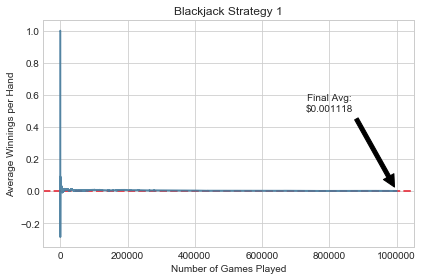

In [7]:
# set common random number seed for use across strategies
random.seed(42)

# initialize variables
deck, winnings, winnings_list, games, games_list = initialize_simulation()

# simulate games
for i in range(1000000):
    deck, winnings, games = play_strategy_1(deck, winnings, games)
    winnings_list.append(winnings)
    games_list.append(games)

# create summary table
dfStrategy1 = pd.DataFrame({"games": games_list, "winnings": winnings_list})

# graph outcome
graph_outcome(games_list, winnings_list, 'Blackjack Strategy 1')

##### Strategy 2

In the appendix, I have defined a function that plays a hand of blackjack based on the logic laid out previously for strategy 2.  To review, this strategy builds on strategy 1 by adding in the concept of doubling down.

* If we are dealt a hand totaling 11, double down
* If we are dealt a hand totaling 10 and dealer's up-card is a 2-9, double down
* If we are dealt a hand totaling 9 and dealer's up-card is a 2-6, double down

##### Strategy 2: Demo

Below is a quick demo using strategy 2 to play 3 games of blackjack, betting $1 each game.  This quick demo is just to demonstrate how the functions created above work by showing print statements of what is happening each game.  After this, we will simulate many more games to better approximate strategy 2's average winnings or losses per game.

In [8]:
# set common random number seed to ensure demonstration of doubling down
random.seed(9)

# initialize variables
deck, winnings, winnings_list, games, games_list = initialize_simulation()

# simulate games
for i in range(3):
    deck, winnings, games = play_strategy_2(deck, winnings, games, print_logical=True)

DEAL
Generated new decks and shuffled cards
My hand: [4, 6]
Dealer's hand: [3, 7] ... we don't know the second card though...
END DEAL

MY PLAY
Double down!
Hit!
My hand: [4, 6, 3] = 13
My final hand: [4, 6, 3] = 13
END MY PLAY

DEALER'S PLAY
Hit!
Dealer's hand: [3, 7, 4] = 14
Hit!
Dealer's hand: [3, 7, 4, 8] = 22
Dealer's final hand: [3, 7, 4, 8] = 22
END DEALER'S PLAY

SETTLING BETS
Dealer busted!
Win $2
END SETTLING BETS

SUMMARY STATS
Games played so far: 1
Total winnings (losses): 2.0
Average winnings (losses) per game: 2.0
END SUMMARY STATS

------------------------------

DEAL
My hand: [6, 2]
Dealer's hand: [9, 4] ... we don't know the second card though...
END DEAL

MY PLAY
Hit!
My hand: [6, 2, 10] = 18
My final hand: [6, 2, 10] = 18
END MY PLAY

DEALER'S PLAY
Hit!
Dealer's hand: [9, 4, 7] = 20
Dealer's final hand: [9, 4, 7] = 20
END DEALER'S PLAY

SETTLING BETS
My hand is worse than the dealer's :(
Lose $1
END SETTLING BETS

SUMMARY STATS
Games played so far: 2
Total winnings 

##### Strategy 2: Simulation

Below, I simulate 1 million games of blackjack using strategy 2.  As can be seen below, this strategy has a return of roughly 2.0%.  With the simple addition of doubling down to the basic strategy of strategy 1, this has drastically increased returns!

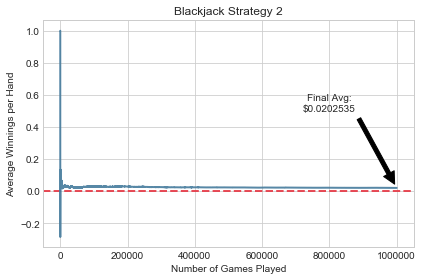

In [9]:
# set common random number seed for use across strategies
random.seed(42)

# initialize variables
deck, winnings, winnings_list, games, games_list = initialize_simulation()

# simulate games
for i in range(1000000):
    deck, winnings, games = play_strategy_2(deck, winnings, games)
    winnings_list.append(winnings)
    games_list.append(games)

# create summary table
dfStrategy2 = pd.DataFrame({"games": games_list, "winnings": winnings_list})

# graph outcome
graph_outcome(games_list, winnings_list, 'Blackjack Strategy 2')

##### Strategy 3

In the appendix, I have defined a function that plays a hand of blackjack based on the logic laid out previously for strategy 3.  To review, this strategy builds on strategy 1 by adding in the concept of splitting pairs.

* If we are dealt either a pair of aces or a pair of 8s, split the pair
* If we are dealt a pair of 2s, 3s, or 7s and the dealer's up-card is 8 or greater, split the pair
* If we are dealt a pair of 6s and the dealer's up-card is 2-6, split the pair

##### Strategy 3: Demo

Below is a quick demo using strategy 3 to play 3 games of blackjack, betting $1 each game.  This quick demo is just to demonstrate how the functions created above work by showing print statements of what is happening each game.  After this, we will simulate many more games to better approximate strategy 3's average winnings or losses per game.

In [10]:
# set common random number seed to ensure demonstration of splitting pairs
random.seed(37)

# initialize variables
deck, winnings, winnings_list, games, games_list = initialize_simulation()

# simulate games
for i in range(3):
    deck, winnings, games = play_strategy_3(deck, winnings, games, print_logical=True)

DEAL
Generated new decks and shuffled cards
My hand: [6, 6]
Dealer's hand: [3, 10] ... we don't know the second card though...
END DEAL

MY PLAY
Splitting pairs
Hand 1: [6] = 6
Hand 2: [6] = 6
Hit!
My hand: [6, 9] = 15
Playing second hand:
Hit!
My hand: [6, 4] = 10
Hit!
My hand: [6, 4, 10] = 20
My final hand: [6, 9] = 15
My second final hand: [6, 4, 10] = 20
END MY PLAY

DEALER'S PLAY
Hit!
Dealer's hand: [3, 10, 10] = 23
Dealer's final hand: [3, 10, 10] = 23
END DEALER'S PLAY

SETTLING BETS
First hand:
Dealer busted!
Win $1
Second hand:
Dealer busted!
Win $1
END SETTLING BETS

SUMMARY STATS
Games played so far: 1
Total winnings (losses): 2.0
Average winnings (losses) per game: 2.0
END SUMMARY STATS

------------------------------

DEAL
My hand: [10, 5]
Dealer's hand: [10, 10] ... we don't know the second card though...
END DEAL

MY PLAY
Hit!
My hand: [10, 5, 10] = 25
My final hand: [10, 5, 10] = 25
END MY PLAY

DEALER'S PLAY
Dealer's final hand: [10, 10] = 20
END DEALER'S PLAY

SETTLIN

##### Strategy 3: Simulation

Below, I simulate 1 million games of blackjack using strategy 3.  As can be seen below, this strategy has a return of roughly 0.4%.  While this did increase our profits versus strategy 1, this strategy was not nearly as successful as strategy 2.  Splitting pairs and doubling down are not mutually exclusive though, so I will try strategy 4 next that combines strategies 1, 2, and 3!

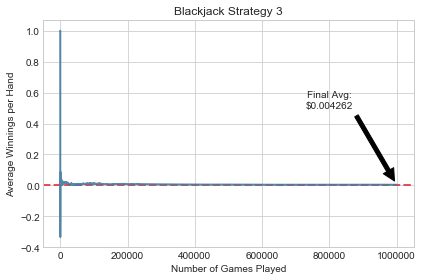

In [11]:
# set common random number seed for use across strategies
random.seed(42)

# initialize variables
deck, winnings, winnings_list, games, games_list = initialize_simulation()

# simulate games
for i in range(1000000):
    deck, winnings, games = play_strategy_3(deck, winnings, games)
    winnings_list.append(winnings)
    games_list.append(games)

# create summary table
dfStrategy3 = pd.DataFrame({"games": games_list, "winnings": winnings_list})

# graph outcome
graph_outcome(games_list, winnings_list, 'Blackjack Strategy 3')

##### Strategy 4

In the appendix, I have defined a function that plays a hand of blackjack based on the logic laid out previously for strategy 4.  To review, this strategy is a combination of strategies 1, 2, and 3 with one added condition.

* If we could either double down or split a pair, prioritize doubling down since that strategy was more successful

##### Strategy 4: Demo

Below is a quick demo using strategy 4 to play 5 games of blackjack, betting $1 each game.  This quick demo is just to demonstrate how the functions created above work by showing print statements of what is happening each game.  After this, we will simulate many more games to better approximate strategy 4's average winnings or losses per game.

In [12]:
# set common random number seed to ensure demonstration of doubling down and splitting pairs
random.seed(39)

# initialize variables
deck, winnings, winnings_list, games, games_list = initialize_simulation()

# simulate games
for i in range(5):
    deck, winnings, games = play_strategy_4(deck, winnings, games, print_logical=True)

DEAL
Generated new decks and shuffled cards
My hand: [6, 10]
Dealer's hand: [10, 8] ... we don't know the second card though...
END DEAL

MY PLAY
Hit!
My hand: [6, 10, 10] = 26
My final hand: [6, 10, 10] = 26
END MY PLAY

DEALER'S PLAY
Dealer's final hand: [10, 8] = 18
END DEALER'S PLAY

SETTLING BETS
My bust :(
Lose $1
END SETTLING BETS

SUMMARY STATS
Games played so far: 1
Total winnings (losses): -1.0
Average winnings (losses) per game: -1.0
END SUMMARY STATS

------------------------------

DEAL
My hand: [9, 4]
Dealer's hand: [3, 10] ... we don't know the second card though...
END DEAL

MY PLAY
My final hand: [9, 4] = 13
END MY PLAY

DEALER'S PLAY
Hit!
Dealer's hand: [3, 10, 9] = 22
Dealer's final hand: [3, 10, 9] = 22
END DEALER'S PLAY

SETTLING BETS
Dealer busted!
Win $1
END SETTLING BETS

SUMMARY STATS
Games played so far: 2
Total winnings (losses): 0.0
Average winnings (losses) per game: 0.0
END SUMMARY STATS

------------------------------

DEAL
My hand: [7, 4]
Dealer's hand: 

##### Strategy 4: Simulation

Below, I simulate 1 million games of blackjack using strategy 4.  As can be seen below, this strategy has a return of roughly 2.3%.  This was the most successful strategy in terms of generating profits, but to determine if this strategy is worth taking to Vegas, I first need to determine how much variability there is to each strategy which I do in the next section.

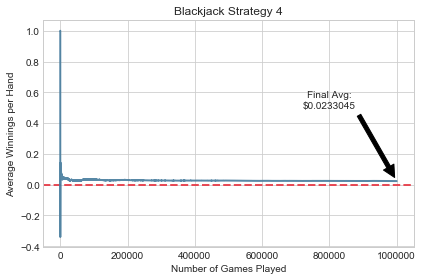

In [13]:
# set common random number seed for use across strategies
random.seed(42)

# initialize variables
deck, winnings, winnings_list, games, games_list = initialize_simulation()

# simulate games
for i in range(1000000):
    deck, winnings, games = play_strategy_4(deck, winnings, games)
    winnings_list.append(winnings)
    games_list.append(games)

# create summary table
dfStrategy4 = pd.DataFrame({"games": games_list, "winnings": winnings_list})

# graph outcome
graph_outcome(games_list, winnings_list, 'Blackjack Strategy 4')

##### Analysis and Comparison of Strategies

Since I am simulating full playthroughs of decks, there could potentially be some interaction between games in a deck since later games will have fewer cards remaining in the deck than earlier games.  Rather than taking the sample variance of all winnings and losses per game and since I am interested in long-run results of these strategies, I will use the method of batch means to determine the grand mean and sample variance for each strategy's winnings to create a 95% confidence interval for each strategy.  Also to note, I used a common random seed at the beginning of each of the strategies' simulations to ensure that all strategies had the same sequence of cards to play from.

As can be seen in the table (see appendix for code used to create) below sorted from highest to lowest mean, strategy 4 (doubling down plus splitting pairs) has the highest estimated mean, with a return of roughly 2.3%.   Strategy 2 (doubling down) is very close in terms of estimated returns, with a return of roughly 2.0%.  Strategy 3 (splitting pairs) has significantly lower returns than strategies 4 and 2, with a return of roughly 0.4%.  Lastly, strategy 1 (no doubling down or splitting pairs) has the lowest estimated returns, with a return of approximately 0.1%.

Investigating the confidence intervals via batch means reveals that strategy 4 has a slightly wider 95% confidence interval than the other strategies, while strategy 1 has the narrowest confidence interval.  Despite having such a narrow confidence interval, strategy 1's confidence interval shows that we couldn't be certain that this strategy would even produce winnings, since it's lower 95% confidence interval bound is negative.

All that being considered, strategy 4 appears to be the best strategy to take to Vegas of the strategies I simulated, as it provides higher returns than the other strategies, even if that does come at the expense of slightly higher uncertainty.

In [15]:
# display strategy confidence intervals
dfStrategyConfIntervals

,strategy,lower_95,grand_mean,upper_95,half_length
0,4,0.020749,0.023304,0.025860,0.002556
1,2,0.017902,0.020254,0.022605,0.002352
2,3,0.001953,0.004262,0.006571,0.002309
3,1,-0.000969,0.001118,0.003205,0.002087


### Conclusion

As shown in this simulation, both doubling down and splitting pairs are very good strategies to use when playing blackjack.  On their own, they can increase winnings over simpler strategies that only take into account the dealer's up-card.  However, when the two are combined, they are even better at increasing winnings than on their own.  

In this paper, we found a strategy that was able to earn approximately a 2.3% return on average.  Considering that some blackjack tables allow for bets ranging up to \\$500 per hand, bets of this amount would equate to a return of $11.50 per hand on average over the long run.

This leads to several questions that would be of interest to study in future research.  For one, if we could earn \\$11.50 per hand on average using strategy 4 and betting $500 per hand, how long does a typical hand of blackjack take to play?  If we were able to estimate the mean and variance of playing time per hand of blackjack (potentially either by surveying casinos or timing hands played in casinos), we could use that to provide a better estimate of what hourly rate we could expect to earn.

An obvious second area that would be of interest for future research would be to brainstorm other blackjack strategies and simulate them.  There are many other potential strategies that could yield even better returns than the 2.3% returns seen in this paper's best performing strategy.

Lastly, a third area of future research would be to investigate the range of consecutive losses that may be incurred while playing any of these strategies to better understand how much money would be needed up-front to be able to reach the long-term return of 2.3% per hand.  If by random chance we have many losses in a row while betting $500 per hand, we could easily run out of money before ever realizing that long-term return.  Therefore, we would want to know how much money to bring to the casino to be able to reach the long-term steady state return.

### Appendix

##### Helper Functions

In [1]:
# import libraries
import random
import math
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

def initialize_simulation():
    """
    Initializes setup for simulation.
    
    Returns:
        deck (list)          -- empty list for deck of cards
        winnings (float)     -- total winnings initialized at zero
        winnings_list (list) -- empty list for winnings/losses
        games(int)           -- total games played initialized at zero
        games_list (list)    -- empty list for games played
    """
    # initialize deck
    deck = []

    # initialize winnings and winnings list
    winnings = 0.0
    winnings_list = []

    # initialize game counter
    games = 0
    games_list = []
    
    return deck, winnings, winnings_list, games, games_list

def generate_deck():
    """
    Generates 6 decks of cards, shuffles cards, and drop uniform random number of cards between 60-75.
    
    Returns:
        deck (list)          -- shuffled decks of cards
    """

    # initialize empty deck
    deck = []

    # append numbered cards 24 times (6 decks & 4 suits)
    for i in range(2,11):
        for j in range(24):
            deck.append(i)

    # append jacks, queens, and kings 24 times (6 decks & 4 suits)
    # represent face cards as 10's
    for i in range(3):
        for j in range(24):
            deck.append(10)

    # append ace's 24 times (6 decks & 4 suits)
    # represent ace cards as 11's
    for i in range(24):
        deck.append(11)

    # shuffle cards
    random.shuffle(deck)

    # insert cut and drop last 60-75 cards
    deck = deck[:len(deck)-random.randint(60,75)]
    return deck

def check_deck(deck, print_logical=False):
    """
    Check if length of deck is zero, and if so, generate new deck.
    
    Parameters:
        deck (list)          -- decks of cards (can be empty list and will be generated via generate_deck function)
        print_logical (bool) -- whether or not to print out gameplay
        
    Returns:
        deck (list)          -- shuffled decks of cards
    """
    if len(deck) == 0:
        if print_logical == True:
            print('Generated new decks and shuffled cards')
        deck = generate_deck()
    return deck

    
def check_aces(hand, print_logical=False):
    """
    Checks if sum of cards in hand is over 21 and if ace is being used as an 11.
    If so, use ace as a 1 instead.
    
    Parameters:
        hand (list)          -- cards currently in player's or dealer's hand
        print_logical (bool) -- whether or not to print out gameplay
        
    Returns:
        hand (list) -- cards in player's or dealer's hand, modified for any ace changes
    """
    if sum(hand) > 21 and 11 in hand:
        hand.remove(11)
        hand.append(1)
        if print_logical == True:
            print('Using ace as a one instead')
            print('Hand:', hand)        
    return hand

def hit(deck, hand, print_logical=False):
    """
    Draws one card from top of deck and places that card in either the player's or dealer's hand.
    
    Parameters:
        deck (list)          -- decks of cards 
        hand (list)          -- cards currently in player's or dealer's hand
        print_logical (bool) -- whether or not to print out gameplay
        
    Returns:
        deck (list)          -- decks of cards, modified for any cards drawn
        hand (list)          -- cards currently in player's or dealer's hand, modified for any cards drawn
    """
    if print_logical == True:
        print('Hit!')
    deck = check_deck(deck, print_logical)
    hand.append(deck.pop(0))
    hand = check_aces(hand, print_logical)
    return deck, hand

def initialize_and_deal(deck, print_logical):
    """
    Sets up variables needed for game of blackjack and deals cards to player and dealer.
    
    Parameters:
        deck (list)          -- decks of cards
        print_logical (bool) -- whether or not to print out gameplay
    
    Returns:
        deck (list)          -- decks of cards, modified for any cards drawn
        my_hand (list)       -- cards currently in player's hand
        my_hand_2 (list)     -- cards currently in player's second hand (for splitting pairs)
        dealer_hand (list)   -- cards currently in dealer's hand
        double_down(int)     -- represents whether we have doubled down
        split(bool)          -- represents whether we have split a pair
        ace_split(bool)      -- represents whether we have split a pair of aces
    """
    # initialize hands
    my_hand = []
    my_hand_2 = []
    dealer_hand = []
    
    # initialize double down multiplier
    double_down = 1
    
    # initialize split and ace split
    split = False
    ace_split = False

    # deal
    if print_logical == True:
        print('DEAL')
    deck = check_deck(deck, print_logical)
    my_hand.append(deck.pop(0))
    deck = check_deck(deck, print_logical)
    dealer_hand.append(deck.pop(0))
    deck = check_deck(deck, print_logical)
    my_hand.append(deck.pop(0))
    deck = check_deck(deck, print_logical)
    dealer_hand.append(deck.pop(0))
    if print_logical == True:
        print('My hand:', my_hand)
        print("Dealer's hand:", dealer_hand, "... we don't know the second card though...")
        print('END DEAL')
        print()
    return deck, my_hand, my_hand_2, dealer_hand, double_down, split, ace_split

def check_naturals(my_hand, dealer_hand, winnings, games, print_logical):
    """
    Checks if player or dealer were dealt a natural.
    
    Parameters:
        my_hand (list)       -- cards currently in player's hand
        dealer_hand (list)   -- cards currently in dealer's hand
        winnings (float)     -- running total of winnings/losses
        games (int)          -- running total of games played
        print_logical (bool) -- whether or not to print out gameplay
    
    Returns:
        winnings (float)     -- running total of winnings/losses, modified for current game's winnings/losses
        games (int)          -- running total of games played, modified for current game
        natural(bool)        -- whether or not the player or dealer had a natural
    """
    # check for naturals
    natural = False
    if sum(my_hand) == 21:
        if sum(dealer_hand) != 21:
            if print_logical == True:
                print('Blackjack (natural) for me!!!')
                print('Win $1.50')
            winnings += 1.5
            games += 1
        else:
            if print_logical == True:
                print('Blackjack (natural) for me and dealer...')
                print('No winnings or losses')
            games += 1
        natural = True
    elif sum(dealer_hand) == 21:
        if print_logical == True:
            print('Blackjack (natural) for the dealer :(')
            print('Lose $1')
        winnings -= 1
        games += 1
        natural = True
    return winnings, games, natural

def hold_or_hit_logic(deck, my_hand, dealer_hand, print_logical):
    """
    Determines whether we should hold or hit based on basic strategy 1.
    
    Parameters:
        deck (list)          -- decks of cards 
        my_hand (list)       -- cards currently in player's hand
        dealer_hand (list)   -- cards currently in dealer's hand
        print_logical (bool) -- whether or not to print out gameplay
        
    Returns:
        deck (list)          -- decks of cards, modified for any cards drawn
        my_hand (list)       -- cards currently in player's hand, modified for any cards drawn
    """
    # initialize stop_play to False
    stop_play = False
    # continue hitting until strategy condition is met
    while stop_play == False:
        # check conditions to stop hitting
        if (sum(my_hand) >= 18) or (
            dealer_hand[0] >= 7 and sum(my_hand) >=17) or (
            4 <= dealer_hand[0] < 7 and sum(my_hand) >= 12) or (
            dealer_hand[0] <= 3 and sum(my_hand) >= 13):
            stop_play = True
        # check if we have an ace and hand is less than 18
        # if so, set stop play back to false
        if sum(my_hand) < 18 and 11 in my_hand:
            stop_play = False
        # if stop play is false, hit
        if stop_play == False:
            deck, my_hand = hit(deck, my_hand, print_logical)
            if print_logical == True:
                print('My hand:', my_hand, '=', sum(my_hand))
    return deck, my_hand

def double_down_logic(deck, my_hand, dealer_hand, double_down, print_logical):
    """
    Logic for determining whether or not we should double down.
    
    Parameters:
        deck (list)          -- decks of cards 
        my_hand (list)       -- cards currently in player's hand
        dealer_hand (list)   -- cards currently in dealer's hand
        double_down(int)     -- represents whether we have doubled down
        print_logical (bool) -- whether or not to print out gameplay
        
    Returns:
        deck (list)          -- decks of cards, modified for any cards drawn
        my_hand (list)       -- cards currently in player's hand, modified for any cards drawn
        dealer_hand (list)   -- cards currently in dealer's hand
        double_down(int)     -- represents whether we have doubled down
    """
    # logic for doubling down
    if sum(my_hand) == 11 or (
        sum(my_hand) == 10 and dealer_hand[0] <= 9) or (
        sum(my_hand) == 9 and dealer_hand[0] <= 6):
        if print_logical == True:
            print('Double down!')
        double_down = 2
        # take only one card since we are doubling down
        deck, my_hand = hit(deck, my_hand, print_logical)
        if print_logical == True:
            print('My hand:', my_hand, '=', sum(my_hand))
    return deck, my_hand, dealer_hand, double_down

def split_pair_logic(deck, my_hand, my_hand_2, dealer_hand, split, ace_split, print_logical):
    """
    Logic for determining whether or not we should split a pair.
    
    Parameters:
        deck (list)          -- decks of cards 
        my_hand (list)       -- cards currently in player's hand
        my_hand_2 (list)     -- cards currently in player's second hand
        dealer_hand (list)   -- cards currently in dealer's hand
        split(bool)          -- represents whether or not we have split a pair
        ace_split(bool)      -- represents whether or not we have split a pair of aces
        print_logical (bool) -- whether or not to print out gameplay
        
    Returns:
        deck (list)          -- decks of cards, modified for any cards drawn
        my_hand (list)       -- cards currently in player's hand, modified for any cards drawn
        my_hand_2 (list)     -- cards currently in player's second hand, modified for any cards drawn
        split(bool)          -- represents whether or not we have split a pair
        ace_split(bool)      -- represents whether or not we have split a pair of aces
    """
    # check if we should split pairs
    if (my_hand == [11,11]):
        split = True
        ace_split = True
        if print_logical == True:
            print('Splitting a pair of aces and taking one card for each hand')
        my_hand_2.append(my_hand.pop(0))
        deck, my_hand = hit(deck, my_hand, print_logical)
        deck, my_hand_2 = hit(deck, my_hand_2, print_logical)
        if print_logical == True:
            print('My hand:', my_hand, '=', sum(my_hand))
            print('My second hand:', my_hand_2, '=', sum(my_hand_2))
    elif my_hand == [8,8] or (
        dealer_hand[0] >= 8 and (my_hand == [2,2] or my_hand == [3,3] or my_hand == [7,7])) or (
        2 <= dealer_hand[0] < 7 and my_hand == [6,6]):
        split = True
        my_hand_2.append(my_hand.pop(0))
        if print_logical == True:
            print('Splitting pairs')
            print('Hand 1:', my_hand, '=', sum(my_hand))
            print('Hand 2:', my_hand_2, '=', sum(my_hand_2))
    return deck, my_hand, my_hand_2, split, ace_split

def dealer_logic(deck, dealer_hand, print_logical):
    """
    Determines whether dealer should hit or hold.
    
    Parameters:
        deck (list)          -- decks of cards 
        dealer_hand (list)   -- cards currently in dealer's hand
        print_logical (bool) -- whether or not to print out gameplay
        
    Returns:
        deck (list)          -- decks of cards, modified for any cards drawn
        dealer_hand (list)   -- cards currently in dealer's hand, modified for any cards drawn
    """
    if print_logical == True:
        print("DEALER'S PLAY")
    # check if ace needs to be a 1 if over 21
    dealer_hand = check_aces(dealer_hand, print_logical)
    while sum(dealer_hand) < 17:
        deck, dealer_hand = hit(deck, dealer_hand, print_logical)
        if print_logical == True:
            print("Dealer's hand:", dealer_hand, '=', sum(dealer_hand))
    if print_logical == True:
        print("Dealer's final hand:", dealer_hand, '=', sum(dealer_hand))
        print("END DEALER'S PLAY")
    return deck, dealer_hand

def settle_bets(my_hand, my_hand_2, dealer_hand, double_down, split, ace_split, winnings, games, print_logical):
    """
    Logic for settling bets.
    
    Parameters:
        my_hand (list)       -- cards currently in player's hand
        my_hand_2 (list)     -- cards currently in player's second hand (only if split pairs)
        dealer_hand (list)   -- cards currently in dealer's hand
        double_down(int)     -- represents whether we have doubled down
        split(bool)          -- represents whether we have split a pair
        ace_split(bool)      -- represents whether we have split a pair of aces
        winnings (float)     -- running total of winnings/losses
        games (int)          -- running total of games played
        print_logical (bool) -- whether or not to print out gameplay
        
    Returns:  
        winnings (float)     -- running total of winnings/losses, modified for current game's winnings/losses
        games (int)          -- running total of games played, modified for current game
    """
    if print_logical == True:
        print()
        print('SETTLING BETS')
        if split == True:
            print('First hand:')
    # check if my hand is over 21
    if sum(my_hand) > 21:
        if print_logical == True:
            print('My bust :(')
            if double_down == 1:
                print('Lose $1')
            else:
                print('Lose $2')
        winnings -= 1*double_down
        games += 1
    # check if my hand and dealer's hands are equal
    elif sum(my_hand) == sum(dealer_hand):
        if print_logical == True:
            print('Tie with dealer')
            print('No winnings or losses')
        games += 1
    # check if my hand is blackjack
    elif sum(my_hand) == 21:
        if print_logical == True:
            print('Blackjack for me!!!')
            if ace_split == True:
                print('Win $1')
            elif double_down == 1:
                print('Win $1.50')
            else:
                print('Win $3')
        if ace_split == True:
            winnings += 1
        else:
            winnings += 1.5*double_down
        games += 1
    # check if dealer's hand is over 21
    elif sum(dealer_hand) > 21:
        if print_logical == True:
            print('Dealer busted!')
            if double_down == 1:
                print('Win $1')
            else:
                print('Win $2')
        winnings += 1*double_down
        games += 1
    # check if my hand is better than dealer's hand
    elif sum(my_hand) > sum(dealer_hand):
        if print_logical == True:
            print("My hand is better than the dealer's!")
            if double_down == 1:
                print('Win $1')
            else:
                print('Win $2')
        winnings += 1*double_down
        games += 1
    # losing condition
    else:
        if print_logical == True:
            print("My hand is worse than the dealer's :(")
            if double_down == 1:
                print('Lose $1')
            else:
                print('Lose $2')
        winnings -= 1*double_down
        games += 1
    
    # settle bets for second hand if split pairs
    if split == True:
        if print_logical == True:
            print('Second hand:')
        # check if my hand is over 21
        if sum(my_hand_2) > 21:
            if print_logical == True:
                print('My bust :(')
                print('Lose $1')
            winnings -= 1
        # check if my hand and dealer's hands are equal
        elif sum(my_hand_2) == sum(dealer_hand):
            if print_logical == True:
                print('Tie with dealer')
                print('No winnings or losses')
        # check if my hand is blackjack
        elif sum(my_hand_2) == 21:
            if print_logical == True:
                print('Blackjack for me!!!')
                if ace_split == True:
                    print('Win $1')
                else:
                    print('Win $1.50')
            if ace_split == True:
                winnings += 1
            else:
                winnings += 1.5
        # check if dealer's hand is over 21
        elif sum(dealer_hand) > 21:
            if print_logical == True:
                print('Dealer busted!')
                print('Win $1')
            winnings += 1
        # check if my hand is better than dealer's hand
        elif sum(my_hand_2) > sum(dealer_hand):
            if print_logical == True:
                print("My hand is better than the dealer's!")
                print('Win $1')
            winnings += 1
        # losing condition
        else:
            if print_logical == True:
                print("My hand is worse than the dealer's :(")
                print('Lose $1')
            winnings -= 1
    
    if print_logical == True:
        print('END SETTLING BETS')
    return winnings, games

def summary_stats(games, winnings, print_logical):
    """
    Displays summary statistics for games played so far.
    
    Parameters:
        games (int)          -- running total of games played
        winnings (float)     -- running total of winnings/losses
        print_logical (bool) -- whether or not to print out gameplay
    """
    # show summary stats
    if print_logical == True:
        print()
        print('SUMMARY STATS')
        print('Games played so far:', games)
        print('Total winnings (losses):', winnings)
        print('Average winnings (losses) per game:', winnings/games)
        print('END SUMMARY STATS')
        print()
        print('------------------------------')
        print()

# define graphing function
def graph_outcome(games_list, winnings_list, plot_title):
    """
    Graphs outcome of many simulated blackjack games' average winnings per game.
    
    Parameters:
        games_list (list)    -- list containing number of games played
        winnings_list (list) -- list containing running total of winnings/losses
        plot_title (str)     -- name of graph
        
    Returns:
        plot                 -- plot showing simulated hands of blackjack
    """
    # create pandas dataframe of games and winnings
    dfStrategy = pd.DataFrame({"games": games_list,
                              "winnings": winnings_list})
    
    # create average winnings
    dfStrategy['avg_winnings'] = dfStrategy['winnings']/dfStrategy['games']
    
    # graph average winnings
    games = np.array(dfStrategy['games'])
    avg_winnings = np.array(dfStrategy['avg_winnings'])
    final_avg = 'Final Avg:' + '\n' + '$' + str(dfStrategy['avg_winnings'].iloc[-1])
    
    plt.style.use('seaborn-whitegrid')

    fig, ax = plt.subplots()

    ax.axhline(0, color = '#e63946', alpha = 0.9, linestyle = '--', linewidth = 2)
    ax.plot(games, avg_winnings, color = '#457b9d', alpha = 0.9, linewidth = 2)
    ax.annotate(final_avg, xy=(len(games_list),dfStrategy['avg_winnings'].iloc[-1]), 
                xytext=(len(games_list)*0.8, dfStrategy['avg_winnings'].iloc[0]*0.5), 
                horizontalalignment='center',arrowprops = dict(facecolor = 'black', shrink=0.05))

    ax.set_title(plot_title)
    ax.set_xlabel('Number of Games Played')
    ax.set_ylabel('Average Winnings per Hand')
    
    plt.tight_layout()

    plt.show()

##### Strategy 1 Function

In [2]:
def play_strategy_1(deck, winnings, games, print_logical=False):
    """
    Play hand of blackjack, no doubling down or splitting pairs.
    
    Parameters:
        deck (list)          -- decks of cards (can be empty list and will be generated via generate_deck function)
        winnings (float)     -- cumulative sum of winnings (or losses) so far
        games (int)          -- cumulative sum of games played so far
        print_logical (bool) -- whether or not to print out gameplay
        
    Returns:
        deck (list)          -- decks of cards
        winnings (float)     -- cumulative sum of winnings (or losses) so far
        games (int)          -- cumulative sum of games played so far
    """
    # initialize game
    deck, my_hand, my_hand_2, dealer_hand, double_down, split, ace_split = initialize_and_deal(deck, print_logical)

    # check if aces should be changed to 1's
    my_hand = check_aces(my_hand, print_logical)
    
    # check for naturals
    winnings, games, natural = check_naturals(my_hand, dealer_hand, winnings, games, print_logical)

    # logic for no naturals on deal
    if natural == False:
        # logic for my play
        if print_logical == True:
            print('MY PLAY')
        deck, my_hand = hold_or_hit_logic(deck, my_hand, dealer_hand, print_logical)
        if print_logical == True:
            print('My final hand:', my_hand, '=', sum(my_hand))
            print('END MY PLAY')
            print()

        # logic for dealer
        deck, dealer_hand = dealer_logic(deck, dealer_hand, print_logical)

        # settle bets
        winnings, games = settle_bets(my_hand, my_hand_2, dealer_hand, double_down, 
                                      split, ace_split, winnings, games, print_logical)

    # show summary stats
    summary_stats(games, winnings, print_logical)
    
    return deck, winnings, games

##### Strategy 2 Function

In [3]:
def play_strategy_2(deck, winnings, games, print_logical=False):
    """
    Play hand of blackjack with double down strategy, but no splitting pairs.
    
    Parameters:
        deck (list)          -- decks of cards (can be empty list and will be generated via generate_deck function)
        winnings (float)     -- cumulative sum of winnings (or losses) so far
        games (int)          -- cumulative sum of games played so far
        print_logical (bool) -- whether or not to print out gameplay
        
    Returns:
        deck (list)          -- decks of cards
        winnings (float)     -- cumulative sum of winnings (or losses) so far
        games (int)          -- cumulative sum of games played so far
    """
    # initialize game
    deck, my_hand, my_hand_2, dealer_hand, double_down, split, ace_split = initialize_and_deal(deck, print_logical)

    # check if aces should be changed to 1's
    my_hand = check_aces(my_hand, print_logical)
    
    # check for naturals
    winnings, games, natural = check_naturals(my_hand, dealer_hand, winnings, games, print_logical)

    # logic for no naturals on deal
    if natural == False:
        # logic for my play
        if print_logical == True:
            print('MY PLAY')
            
        # logic for doubling down
        deck, my_hand, dealer_hand, double_down = double_down_logic(deck, my_hand, dealer_hand, 
                                                                    double_down, print_logical)       
        
        # logic if not doubling down
        if double_down == 1:
            deck, my_hand = hold_or_hit_logic(deck, my_hand, dealer_hand, print_logical)
        
        if print_logical == True:
            print('My final hand:', my_hand, '=', sum(my_hand))
            print('END MY PLAY')
            print()

        # logic for dealer
        deck, dealer_hand = dealer_logic(deck, dealer_hand, print_logical)

        # settle bets
        winnings, games = settle_bets(my_hand, my_hand_2, dealer_hand, double_down, 
                                      split, ace_split, winnings, games, print_logical)

    # show summary stats
    summary_stats(games, winnings, print_logical)
    
    return deck, winnings, games

##### Strategy 3 Function

In [4]:
def play_strategy_3(deck, winnings, games, print_logical=False):
    """
    Play hand of blackjack with splitting pairs, but no doubling down.
    
    Parameters:
        deck (list)          -- decks of cards (can be empty list and will be generated via generate_deck function)
        winnings (float)     -- cumulative sum of winnings (or losses) so far
        games (int)          -- cumulative sum of games played so far
        print_logical (bool) -- whether or not to print out gameplay
        
    Returns:
        deck (list)          -- decks of cards
        winnings (float)     -- cumulative sum of winnings (or losses) so far
        games (int)          -- cumulative sum of games played so far
    """
    # initialize game
    deck, my_hand, my_hand_2, dealer_hand, double_down, split, ace_split = initialize_and_deal(deck, print_logical)

    # check for naturals
    winnings, games, natural = check_naturals(my_hand, dealer_hand, winnings, games, print_logical)

    # logic for no naturals on deal
    if natural == False:
        # logic for my play
        if print_logical == True:
            print('MY PLAY')
        
        # check if we should split pairs
        deck, my_hand, my_hand_2, split, ace_split = split_pair_logic(deck, my_hand, my_hand_2, dealer_hand, 
                                                                      split, ace_split, print_logical)
        
        # check if ace should be changed to ones if we didn't split pairs
        if split == False:
            my_hand = check_aces(my_hand, print_logical)
        
        # continue with play unless we split a pair of aces (in which case we only draw one per hand)
        if ace_split == False:
            deck, my_hand = hold_or_hit_logic(deck, my_hand, dealer_hand, print_logical)
            if split == True:
                if print_logical == True:
                    print('Playing second hand:')
                deck, my_hand_2 = hold_or_hit_logic(deck, my_hand_2, dealer_hand, print_logical)
                    
        if print_logical == True:
            print('My final hand:', my_hand, '=', sum(my_hand))
            if split == True:
                print('My second final hand:', my_hand_2, '=', sum(my_hand_2))
            print('END MY PLAY')
            print()

        # logic for dealer
        deck, dealer_hand = dealer_logic(deck, dealer_hand, print_logical)

        # settle bets
        winnings, games = settle_bets(my_hand, my_hand_2, dealer_hand, double_down, 
                                      split, ace_split, winnings, games, print_logical)

    # show summary stats
    summary_stats(games, winnings, print_logical)
    
    return deck, winnings, games

##### Strategy 4 Function

In [5]:
def play_strategy_4(deck, winnings, games, print_logical=False):
    """
    Play hand of blackjack with both doubling down and splitting pairs.  
    If the player could either double down or split a pair, double down.
    
    Parameters:
        deck (list)          -- decks of cards (can be empty list and will be generated via generate_deck function)
        winnings (float)     -- cumulative sum of winnings (or losses) so far
        games (int)          -- cumulative sum of games played so far
        print_logical (bool) -- whether or not to print out gameplay
        
    Returns:
        deck (list)          -- decks of cards
        winnings (float)     -- cumulative sum of winnings (or losses) so far
        games (int)          -- cumulative sum of games played so far
    """
    # initialize game
    deck, my_hand, my_hand_2, dealer_hand, double_down, split, ace_split = initialize_and_deal(deck, print_logical)

    # check for naturals
    winnings, games, natural = check_naturals(my_hand, dealer_hand, winnings, games, print_logical)

    # logic for no naturals on deal
    if natural == False:
        # logic for my play
        if print_logical == True:
            print('MY PLAY')
            
        # logic for doubling down
        deck, my_hand, dealer_hand, double_down = double_down_logic(deck, my_hand, dealer_hand, 
                                                                    double_down, print_logical)       
        
        # logic if not doubling down
        if double_down == 1:
            
            # check if we should split pairs
            deck, my_hand, my_hand_2, split, ace_split = split_pair_logic(deck, my_hand, my_hand_2, dealer_hand, 
                                                                          split, ace_split, print_logical)
        
            # check if ace should be changed to ones if we didn't split pairs
            if split == False:
                my_hand = check_aces(my_hand, print_logical)

            # continue with play unless we split a pair of aces (in which case we only draw one per hand)
            if ace_split == False:
                deck, my_hand = hold_or_hit_logic(deck, my_hand, dealer_hand, print_logical)
                if split == True:
                    if print_logical == True:
                        print('Playing second hand:')
                    deck, my_hand_2 = hold_or_hit_logic(deck, my_hand_2, dealer_hand, print_logical)
                    
        if print_logical == True:
            print('My final hand:', my_hand, '=', sum(my_hand))
            if split == True:
                print('My second final hand:', my_hand_2, '=', sum(my_hand_2))
            print('END MY PLAY')
            print()

        # logic for dealer
        deck, dealer_hand = dealer_logic(deck, dealer_hand, print_logical)

        # settle bets
        winnings, games = settle_bets(my_hand, my_hand_2, dealer_hand, double_down, 
                                      split, ace_split, winnings, games, print_logical)

    # show summary stats
    summary_stats(games, winnings, print_logical)
    
    return deck, winnings, games

##### Create Confidence Intervals Comparing Strategies

In [14]:
# create additional metrics for each strategy
dfStrategy1['avg_winnings'] = dfStrategy1['winnings']/dfStrategy1['games']
dfStrategy1['strategy'] = 1
dfStrategy1['win_loss'] = dfStrategy1['winnings'].diff()
dfStrategy1['win_loss'].iloc[0] = dfStrategy1['winnings'].iloc[0]
dfStrategy1['batch'] = dfStrategy1.index//10000

dfStrategy2['avg_winnings'] = dfStrategy2['winnings']/dfStrategy2['games']
dfStrategy2['strategy'] = 2
dfStrategy2['win_loss'] = dfStrategy2['winnings'].diff()
dfStrategy2['win_loss'].iloc[0] = dfStrategy2['winnings'].iloc[0]
dfStrategy2['batch'] = dfStrategy2.index//10000

dfStrategy3['avg_winnings'] = dfStrategy3['winnings']/dfStrategy3['games']
dfStrategy3['strategy'] = 3
dfStrategy3['win_loss'] = dfStrategy3['winnings'].diff()
dfStrategy3['win_loss'].iloc[0] = dfStrategy3['winnings'].iloc[0]
dfStrategy3['batch'] = dfStrategy3.index//10000

dfStrategy4['avg_winnings'] = dfStrategy4['winnings']/dfStrategy4['games']
dfStrategy4['strategy'] = 4
dfStrategy4['win_loss'] = dfStrategy4['winnings'].diff()
dfStrategy4['win_loss'].iloc[0] = dfStrategy4['winnings'].iloc[0]
dfStrategy4['batch'] = dfStrategy4.index//10000

# concatenate results of strategies
dfStrategyAll = pd.concat([dfStrategy1, dfStrategy2, dfStrategy3, dfStrategy4])

# create batch means by strategy
dfStrategyBatchMeans = dfStrategyAll[['strategy','batch','win_loss']].groupby(by=[
    'strategy','batch'],as_index=False).agg({'win_loss':['mean','count']})
dfStrategyBatchMeans.columns = ['strategy','batch','mean','count']

# calculate grand mean, m observations, and b batches
dfStrategyBatchGrandMeans = dfStrategyBatchMeans.groupby(
    by=['strategy','count'], as_index=False).agg({'mean':['mean'],'batch':['max']})
dfStrategyBatchGrandMeans.columns = ['strategy','m_observations','grand_mean','b_batches']

# add one to batches to adjust for zero indexing
dfStrategyBatchGrandMeans['b_batches'] += 1
dfStrategyBatchGrandMeans.tail()

# join back grand means, m observations, and b batches to batch means
dfStrategyComparison = pd.merge(dfStrategyBatchMeans, dfStrategyBatchGrandMeans, 
                                how='inner', on='strategy')

# calculate batch means estimator for variance by strategy
dfStrategyComparison['sq_diff'] = (dfStrategyComparison['mean'] - dfStrategyComparison['grand_mean'])**2
dfStrategyVariances = dfStrategyComparison.groupby(
    by=['strategy','m_observations','b_batches'], as_index=False).agg({'sq_diff':['sum']})
dfStrategyVariances.columns = ['strategy','m_observations','b_batches','sum_sq_diff']
dfStrategyVariances['variance'] = (dfStrategyVariances['m_observations']/
                                   (dfStrategyVariances['b_batches']-1))*dfStrategyVariances['sum_sq_diff']

# create confidence intervals using batch mean and variance estimators
dfStrategyConfIntervals = pd.merge(
    dfStrategyBatchGrandMeans, dfStrategyVariances, how='inner', on=['strategy','m_observations','b_batches'])
dfStrategyConfIntervals['half_length'] = stats.t.ppf(1-0.025,(dfStrategyConfIntervals['b_batches'])-1)*(
    (dfStrategyConfIntervals['variance']/(
        dfStrategyConfIntervals['m_observations']*dfStrategyConfIntervals['b_batches']))**(1/2))
dfStrategyConfIntervals['lower_95'] = dfStrategyConfIntervals['grand_mean'] - dfStrategyConfIntervals['half_length']
dfStrategyConfIntervals['upper_95'] = dfStrategyConfIntervals['grand_mean'] + dfStrategyConfIntervals['half_length']
dfStrategyConfIntervals = dfStrategyConfIntervals[['strategy','lower_95','grand_mean','upper_95','half_length']]
dfStrategyConfIntervals = dfStrategyConfIntervals.sort_values('grand_mean',ascending=False).reset_index(drop=True)

### Citations
1. Rules from https://bicyclecards.com/how-to-play/blackjack/
2. Betting from https://www.businessinsider.com/blackjack-basics-2014-6